Q1  sobel filter for detecting verticle and horizontal edges

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
img = cv2.imread('lufffy.jpg', cv2.IMREAD_GRAYSCALE)

In [52]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Detect horizontal edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Detect vertical edges

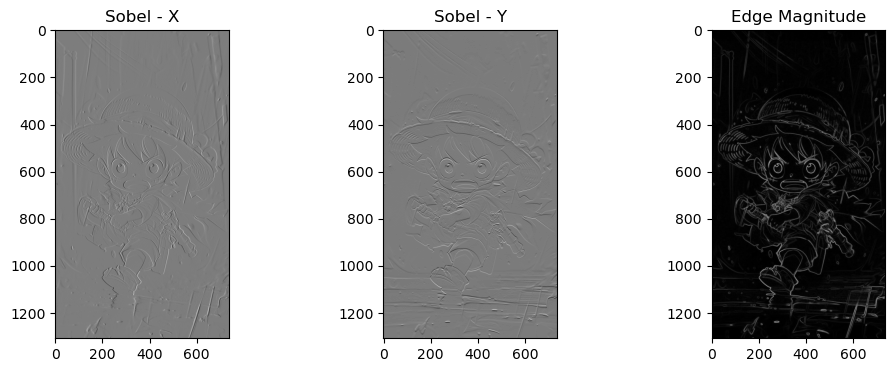

In [60]:
# Compute edge magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)


# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel - X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel - Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Edge Magnitude')
plt.show()


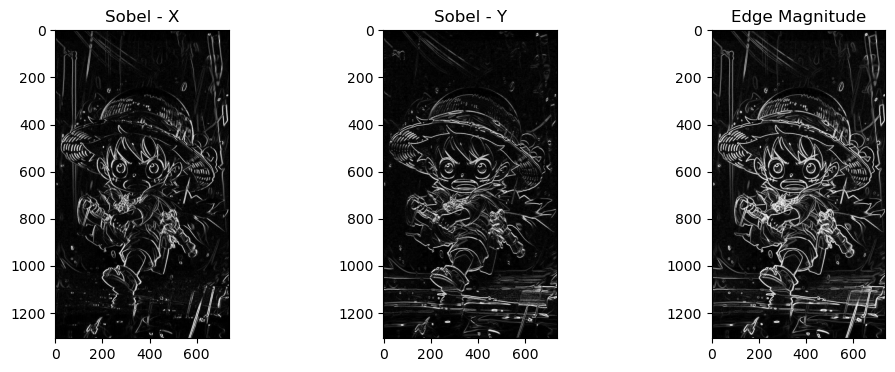

In [66]:
# Normalize for better visualization
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel - X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel - Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Edge Magnitude')
plt.show()

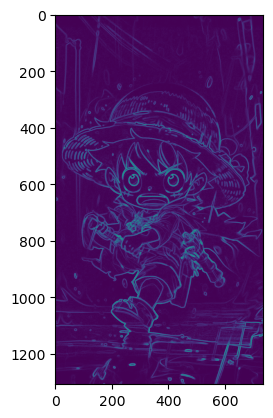

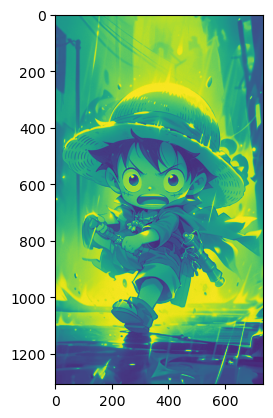

In [62]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobel_x, sobel_y)

# Display results
plt.imshow(edges_sobel)
plt.show()

plt.imshow(img)
plt.show()

Q2 same but using canny filter 

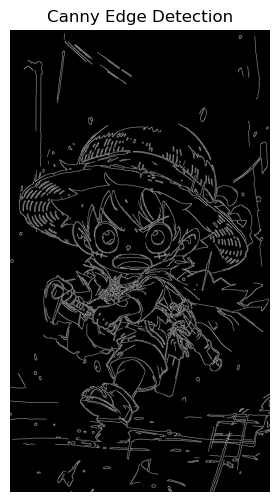

In [75]:
edges = cv2.Canny(img,100,200)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

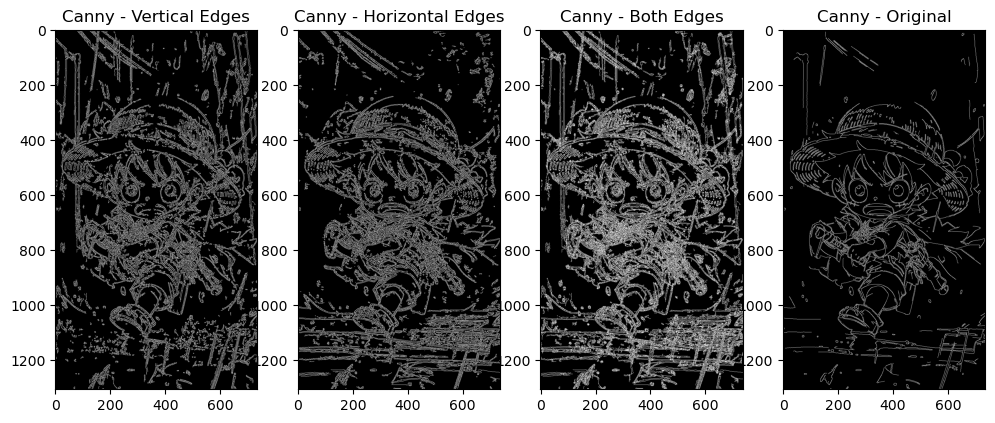

In [77]:
# Apply Canny Edge Detection for full edges
edges_full = cv2.Canny(img, 100, 200)

# Compute gradients using Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Vertical edges
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Horizontal edges

# Convert gradients to absolute values and normalize
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# Apply Canny only in x-direction (Vertical edges)
edges_x = cv2.Canny(sobel_x, 50, 150)

# Apply Canny only in y-direction (Horizontal edges)
edges_y = cv2.Canny(sobel_y, 50, 150)

# Combine vertical and horizontal edges
edges_combined = cv2.bitwise_or(edges_x, edges_y)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(edges_x, cmap='gray'), plt.title('Canny - Vertical Edges')
plt.subplot(1, 4, 2), plt.imshow(edges_y, cmap='gray'), plt.title('Canny - Horizontal Edges')
plt.subplot(1, 4, 3), plt.imshow(edges_combined, cmap='gray'), plt.title('Canny - Both Edges')
plt.subplot(1, 4, 4), plt.imshow(edges_full, cmap='gray'), plt.title('Canny - Original')
plt.show()


Q3 explore and use log(laplacine of gaussion)

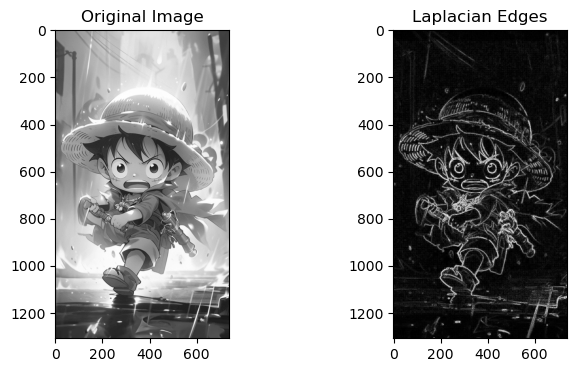

In [80]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Convert scale for proper visualization
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(laplacian_abs, cmap='gray'), plt.title('Laplacian Edges')
plt.show()


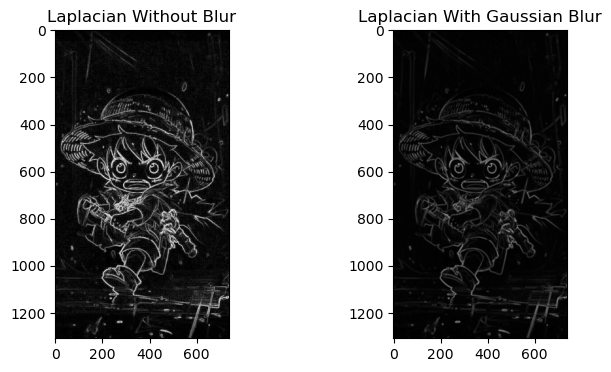

In [82]:
# Apply Gaussian Blur before Laplacian
blurred = cv2.GaussianBlur(img, (5,5), 0)
laplacian_blurred = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian_blurred_abs = cv2.convertScaleAbs(laplacian_blurred)

# Display
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(laplacian_abs, cmap='gray'), plt.title('Laplacian Without Blur')
plt.subplot(1, 2, 2), plt.imshow(laplacian_blurred_abs, cmap='gray'), plt.title('Laplacian With Gaussian Blur')
plt.show()


Q4 explore and use haris corner detector

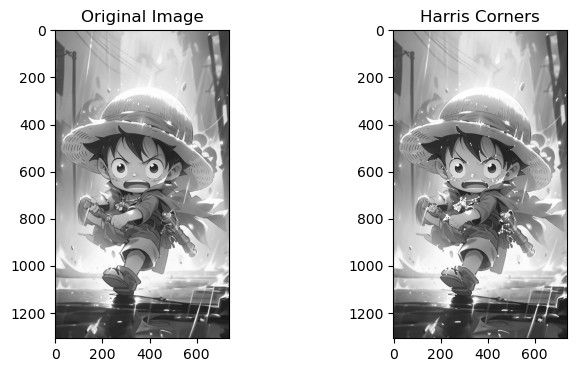

In [88]:
# Convert to float32 (required for Harris)
gray = np.float32(img)

# Apply Harris Corner Detector
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the corner image to enhance visualization
harris_corners = cv2.dilate(harris_corners, None)

# Threshold to identify strong corners
threshold = 0.02 * harris_corners.max()
corner_image = img.copy()
corner_image[harris_corners > threshold] = 255  # Mark corners in white

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(corner_image, cmap='gray'), plt.title('Harris Corners')
plt.show()


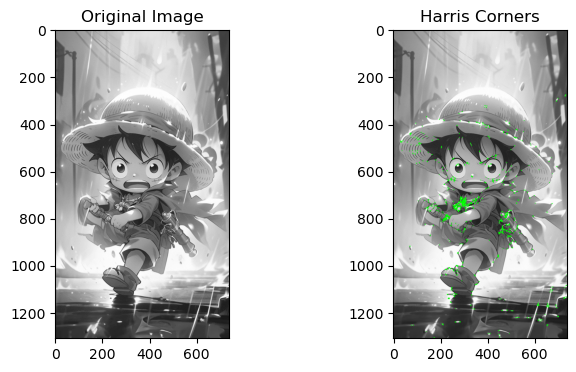

In [113]:
# Convert to float32 (required for Harris)
gray = np.float32(img)

# Apply Harris Corner Detector
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate the detected corners to enhance visibility
harris_corners = cv2.dilate(harris_corners, None)

# Threshold to detect strong corners
threshold = 0.01 * harris_corners.max()
corner_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
corner_image[harris_corners > threshold] = [0, 255, 0]  # Mark corners in green

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(corner_image, cmap='gray'), plt.title('Harris Corners')
plt.show()


Q5 explore and use sift( scale invarient feature transformer )

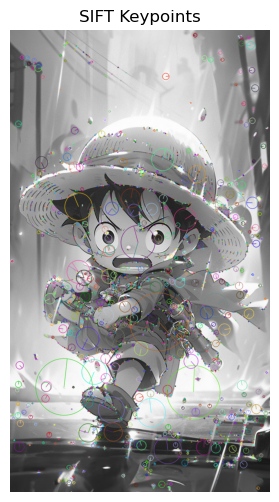

In [115]:
# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
sift_image = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.figure(figsize=(8, 6))
plt.imshow(sift_image, cmap='gray')
plt.title("SIFT Keypoints")
plt.axis("off")
plt.show()


Q6 apply various filter bank to detect texture in the image/

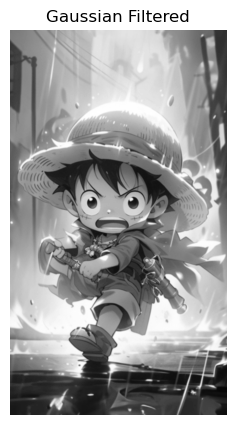

In [118]:
# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), sigmaX=1.5)

# Display result
plt.figure(figsize=(5, 5))
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis("off")
plt.show()


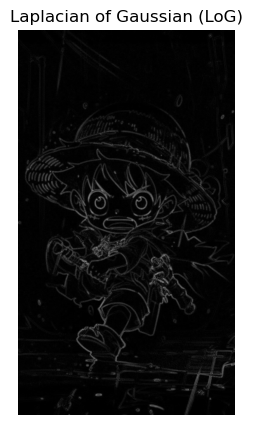

In [120]:
# Apply LoG filter
log_filtered = cv2.Laplacian(img, cv2.CV_64F, ksize=5)

# Convert to absolute values
log_filtered = np.abs(log_filtered)

# Display result
plt.figure(figsize=(5, 5))
plt.imshow(log_filtered, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis("off")
plt.show()


Q7 assuming that your task is to classify image in 3 classes (dog, cat, horse etc) extract feature from the image using various feature extraction process

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to extract color histogram features
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function to apply Canny Edge Detection
def extract_canny_edges(img):
    edges = cv2.Canny(img, 100, 200)
    return edges.flatten()

# Function to extract SIFT Features
def extract_sift_features(img, num_features=128):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    if descriptors is not None:
        # If there are fewer descriptors than desired, pad with zeros
        if descriptors.shape[0] < num_features:
            padding = np.zeros((num_features - descriptors.shape[0], descriptors.shape[1]))
            descriptors = np.vstack((descriptors, padding))
        # If there are more descriptors, truncate to the desired number
        else:
            descriptors = descriptors[:num_features]
        return descriptors.flatten()
    else:
        # If no descriptors found, return zero vector of fixed length
        return np.zeros(num_features * 128)  # Assuming 128 as descriptor length

# Load and preprocess images
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Load dataset (dog, cat, horse)
dog_images, dog_labels = load_images_from_folder('./Dog', label=0)
cat_images, cat_labels = load_images_from_folder('./cat', label=1)
horse_images, horse_labels = load_images_from_folder('./horse', label=2)

# Combine all images and labels
all_images = dog_images + cat_images + horse_images
all_labels = dog_labels + cat_labels + horse_labels

# Feature extraction for all images
features = []
for img in all_images:
    color_hist = extract_color_histogram(img)
    canny_edges = extract_canny_edges(img)
    sift_features = extract_sift_features(img)  # Fixed length for SIFT
    
    # Concatenate all features
    feature_vector = np.concatenate([color_hist, canny_edges, sift_features])
    features.append(feature_vector)

# Convert to numpy array
features = np.array(features)
labels = np.array(all_labels)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a classifier (SVM)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy * 100:.2f}%')

# Display some images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')
    plt.show()
